# World Happiness Report Dataset

The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll.The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country as stated in the previous answer.

If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

# Importing required Libraries

In [4]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt

# Loading Dataset

In [5]:
df=pd.read_csv('happiness_score.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [6]:
df.head()#first 5 data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [7]:
df.tail()#last 5 data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [8]:
df.shape# count of rows & columns

(158, 12)

In [9]:
df['Happiness Rank'].value_counts()

82     2
158    1
50     1
57     1
56     1
      ..
106    1
105    1
104    1
103    1
1      1
Name: Happiness Rank, Length: 157, dtype: int64

# Data Preparation

In [10]:
df.describe()#statistics values

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Observations-:

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [12]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [13]:
df.isnull().sum() #checking for missing values

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

No null value is present in the dataset it means no replcement or cleaning are needed in terms of null values.

# EDA

# Univariate analysis

In [14]:
import seaborn as sn


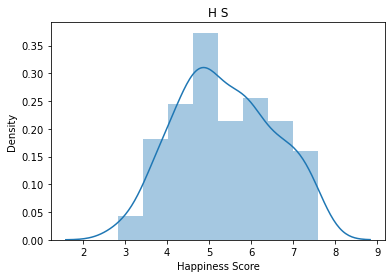

In [15]:
sn.distplot(df["Happiness Score"])
plt.title("H S")
plt.show()

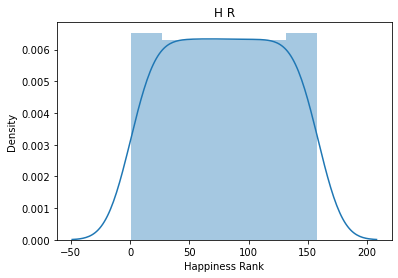

In [16]:
sn.distplot(df["Happiness Rank"])
plt.title("H R")
plt.show()

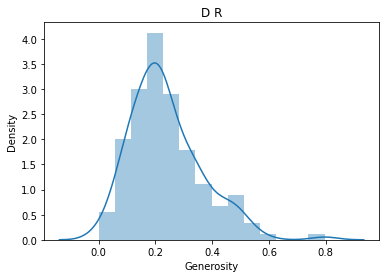

In [17]:
sn.distplot(df["Generosity"])
plt.title("D R")
plt.show()

<AxesSubplot:>

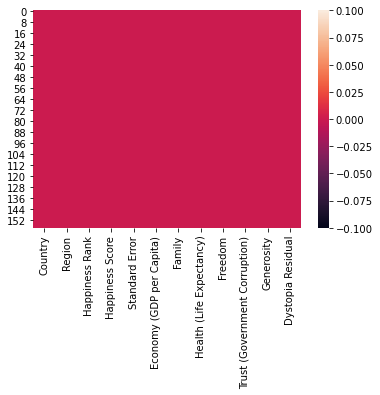

In [18]:
sn.heatmap(df.isnull())

In [19]:
dfcor=df.corr()
dfcor

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


<AxesSubplot:>

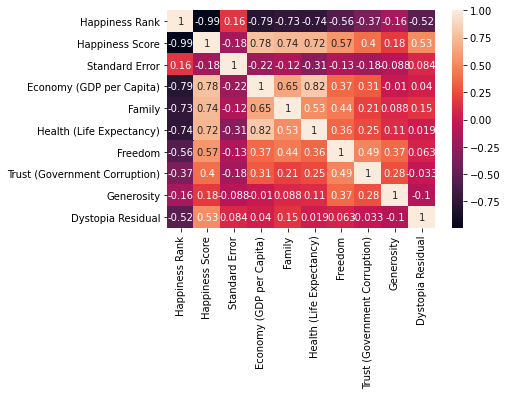

In [20]:
sn.heatmap(dfcor,annot=True)

<AxesSubplot:>

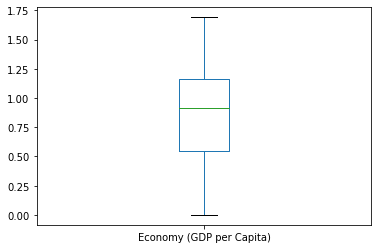

In [21]:
df['Economy (GDP per Capita)'].plot.box()

<AxesSubplot:>

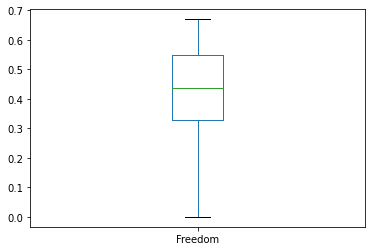

In [22]:
df['Freedom'].plot.box()

<AxesSubplot:>

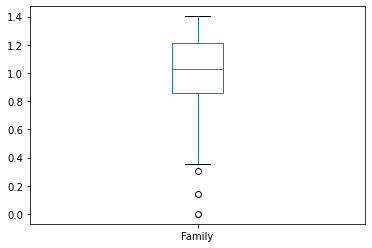

In [23]:
df['Family'].plot.box()

very few outliers are present it seems in family related data.

# Bivariate analysis

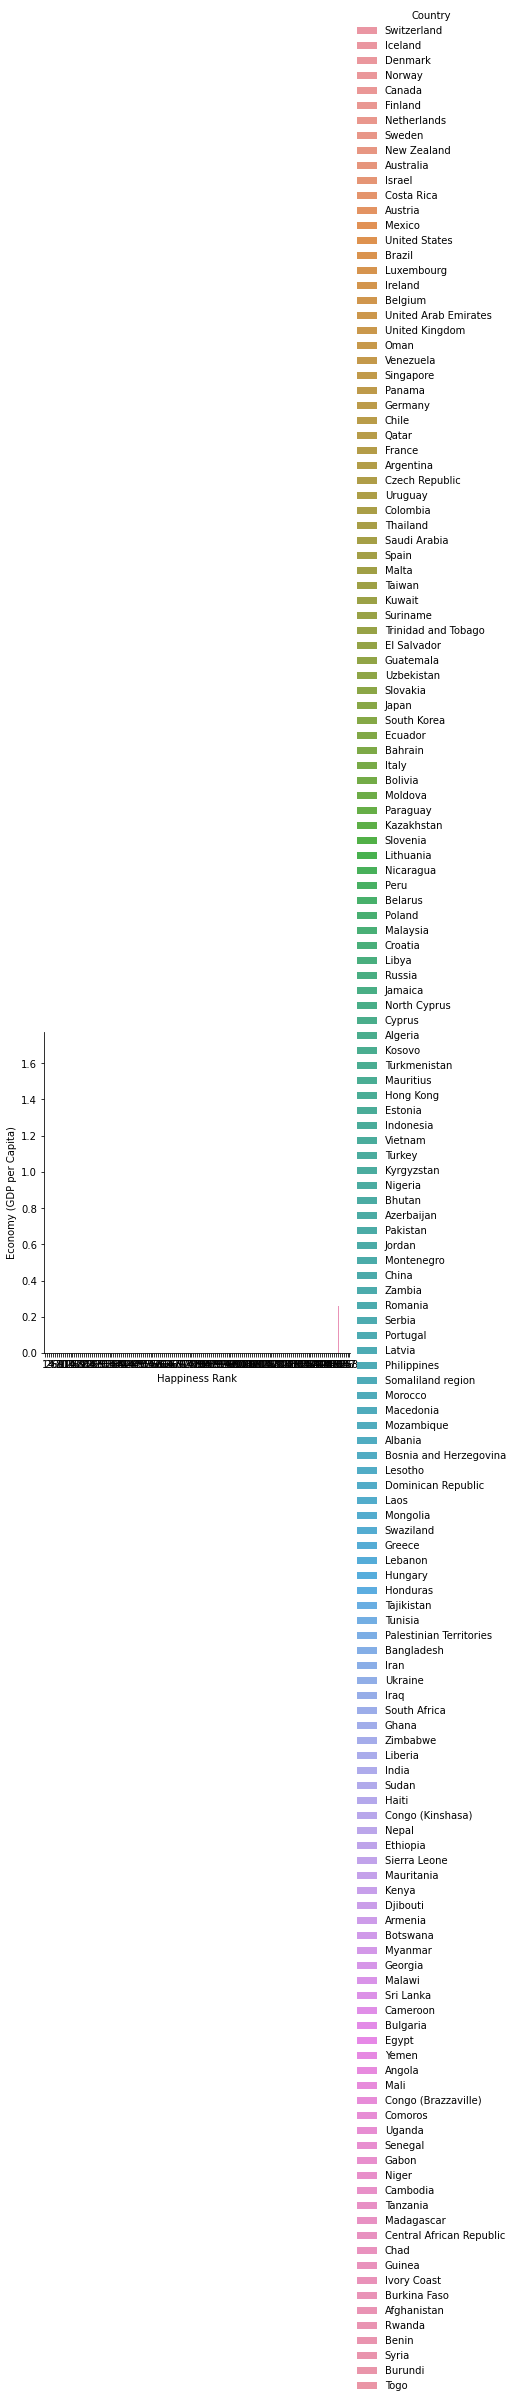

In [24]:
#setup category plot
g=sn.catplot(x="Happiness Rank",y="Economy (GDP per Capita)",hue="Country",data=df,kind="bar")
#show plot
plt.show()

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Happiness Rank'>

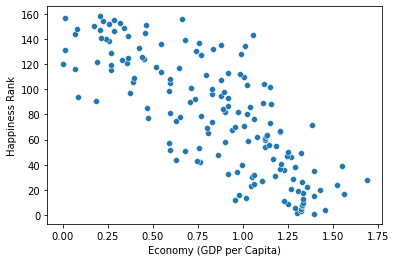

In [25]:
sn.scatterplot(x='Economy (GDP per Capita)',y='Happiness Rank',data=df)

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Happiness Rank'>

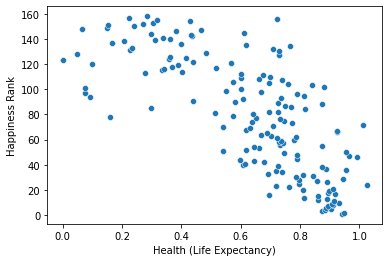

In [26]:
sn.scatterplot(x='Health (Life Expectancy)',y='Happiness Rank',data=df)

<AxesSubplot:xlabel='Family', ylabel='Happiness Rank'>

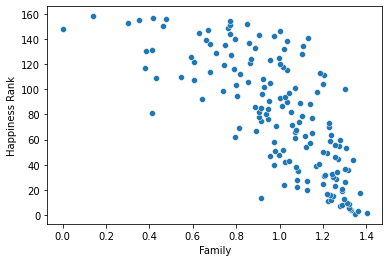

In [27]:
sn.scatterplot(x='Family',y='Happiness Rank',data=df)

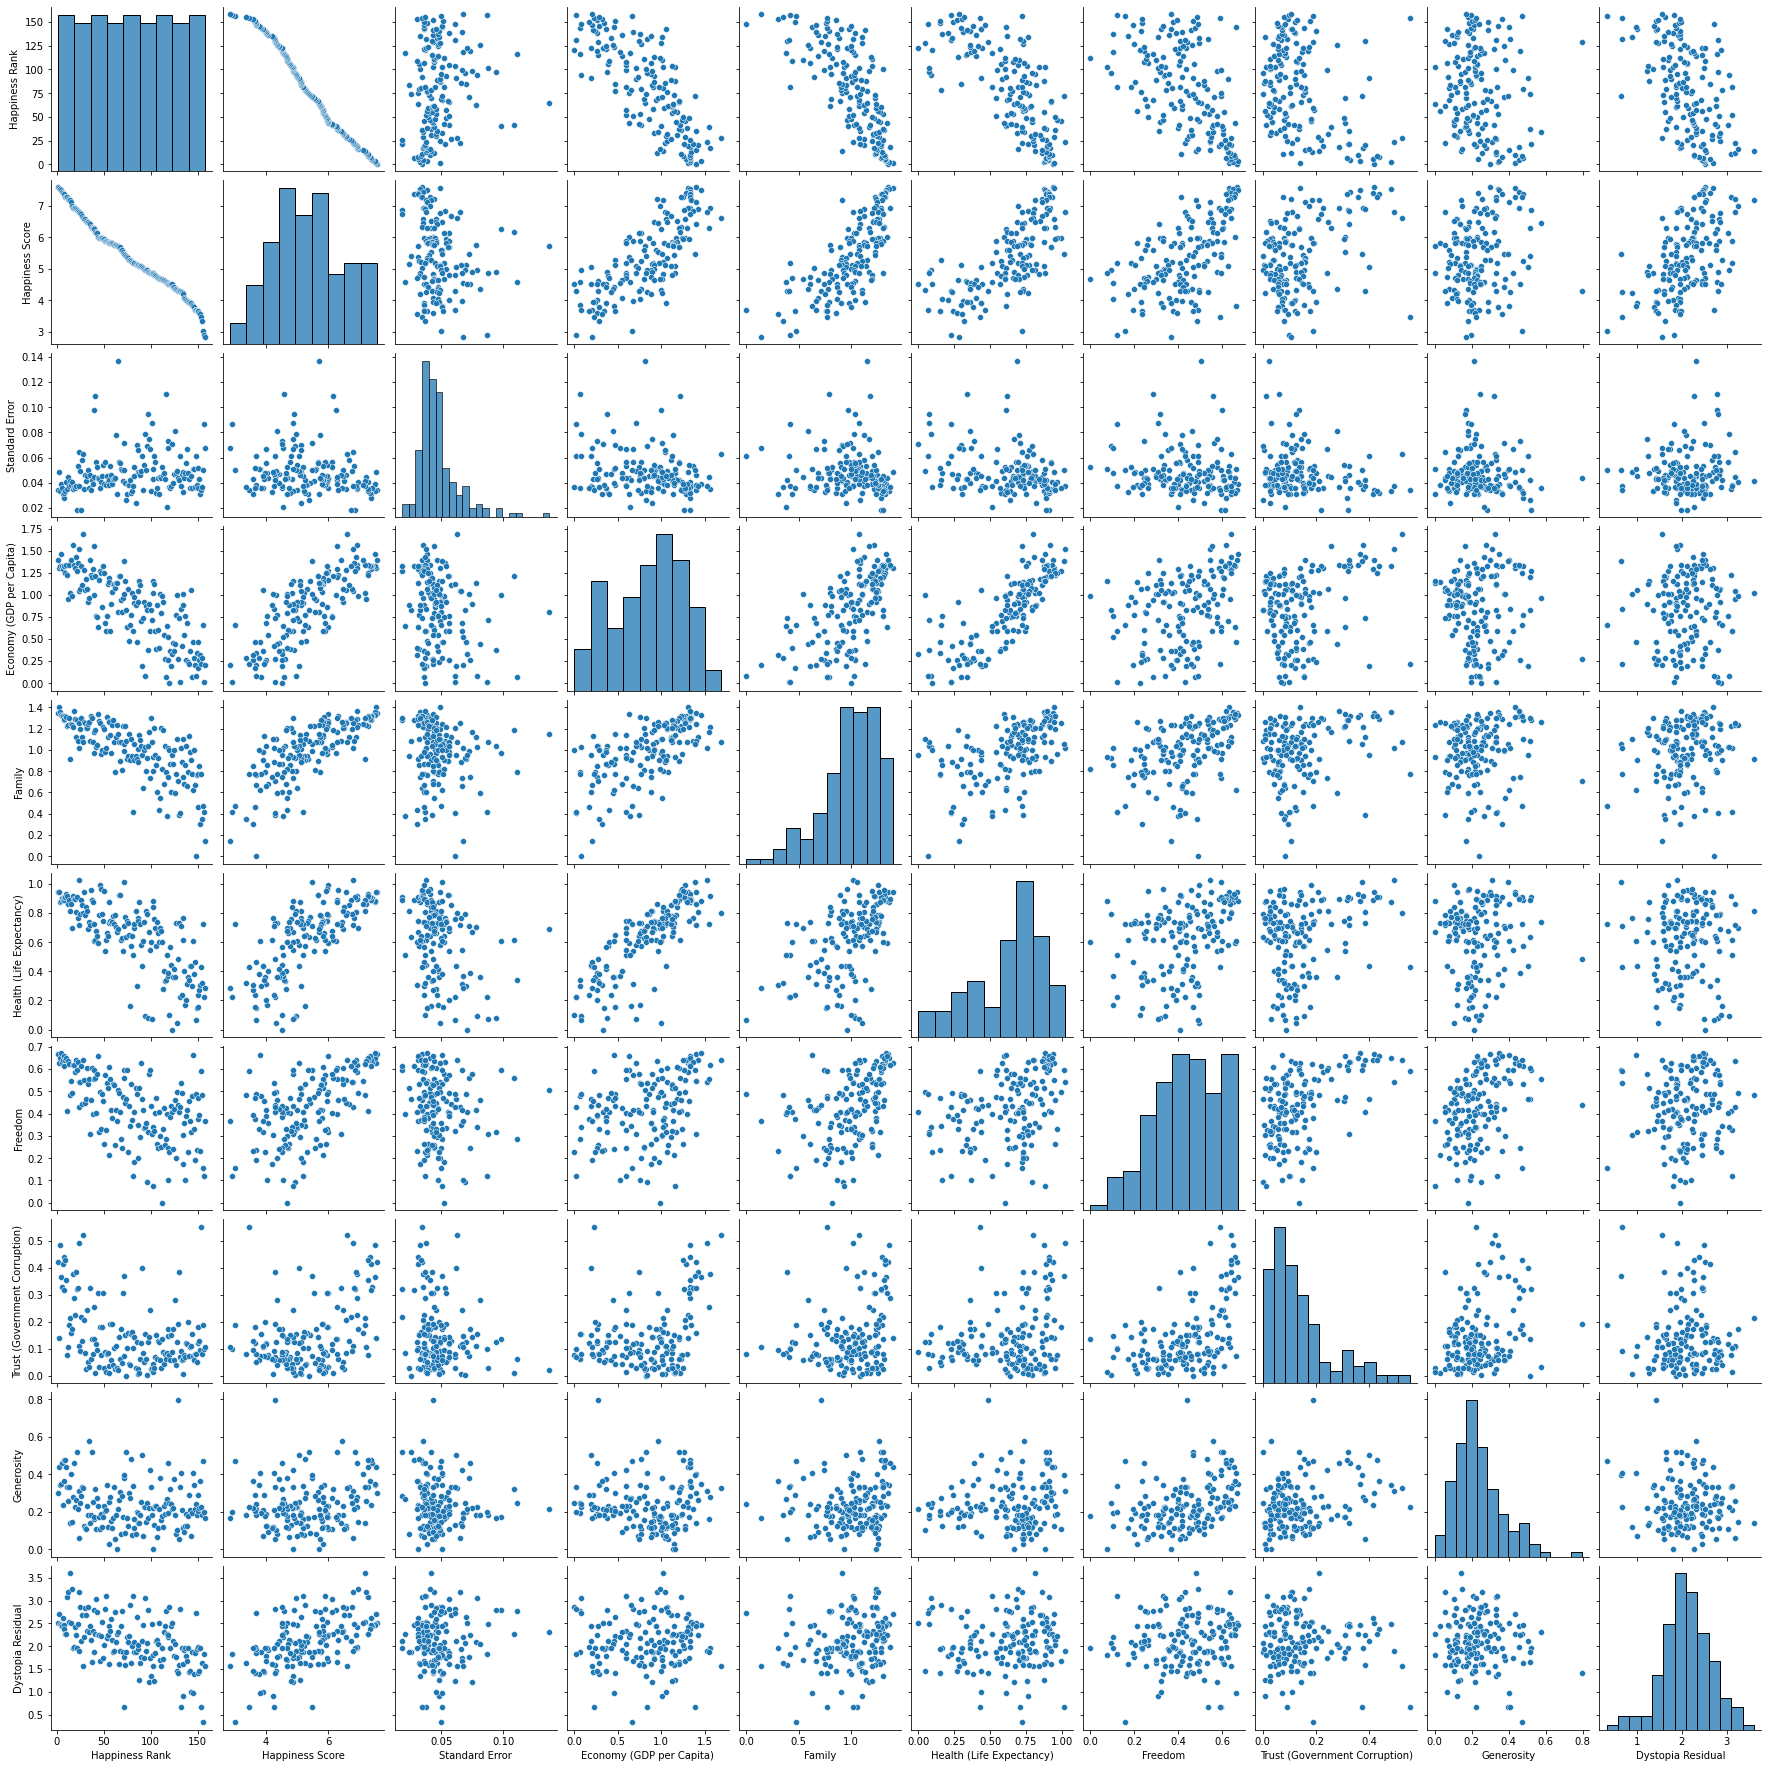

In [28]:
sn.pairplot(df)

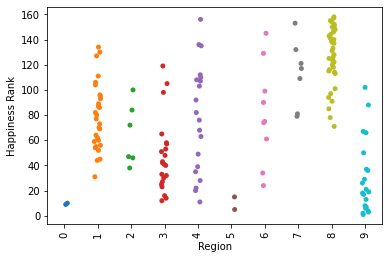

In [47]:
g = sn.stripplot(x = "Region", y = "Happiness Rank", data = df, jitter = True)
plt.xticks(rotation = 90)
plt.show()

# Preparation to train model

In [29]:
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [30]:
le=LabelEncoder()
df['Country']=le.fit_transform(df['Country'])
df['Country']

0      135
1       58
2       37
3      105
4       24
      ... 
153    118
154     13
155    136
156     21
157    141
Name: Country, Length: 158, dtype: int32

In [31]:
le=LabelEncoder()
df['Region']=le.fit_transform(df['Region'])
df['Region']

0      9
1      9
2      9
3      9
4      5
      ..
153    8
154    8
155    4
156    8
157    8
Name: Region, Length: 158, dtype: int32

In [32]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118,8,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136,4,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21,8,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [33]:
df.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

Skewness is acceptable as Trust and generosity isnot affecting the data much.

In [34]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split


In [35]:
df.dtypes

Country                            int32
Region                             int32
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [37]:
Y = df['Happiness Score']
X = df.drop(['Happiness Score', 'Happiness Rank', 'Country', 'Region'], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 101)
lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [38]:
lm.coef_

array([-6.62640689e-04,  1.00012756e+00,  9.99809853e-01,  9.99984279e-01,
        9.99719976e-01,  9.99885249e-01,  9.99747287e-01,  9.99955045e-01])

In [39]:
lm.intercept_

0.00040133230281824694

In [41]:
lm.score(X_train,Y_train)

0.9999999449880753

In [43]:
#predict the value
pred=lm.predict(X_test)
print('Ytest:',pred)
print('Predicted y:',Y_test)

Ytest: [4.2707438  6.12271796 5.83268401 4.8577103  6.45453951 3.7807999
 5.25276766 3.89662325 6.94619608 5.36031616 4.51229833 5.00708623
 6.2692078  5.70878245 5.85522848 5.12881716 5.1937551  5.68879081
 7.42678019 7.56074954 6.47670782 5.12425961 6.13012611 5.88968665
 3.00644144 6.48508376 4.21861884 4.83934205 3.34016694 2.83909529
 3.90379867 4.89742702 4.87599388 5.95967681 5.54813853 4.64229801
 4.29244248 5.58860538 6.75011376 4.69405469 3.81930762 4.51775379
 5.12316384 4.30688469 3.98889628 4.95946562 5.05711843 6.00265085]
Predicted y: 131    4.271
42     6.123
55     5.833
101    4.857
33     6.455
145    3.781
78     5.253
142    3.896
16     6.946
74     5.360
121    4.512
92     5.007
39     6.269
64     5.709
53     5.855
84     5.129
80     5.194
66     5.689
4      7.427
1      7.561
32     6.477
85     5.124
41     6.130
50     5.890
155    3.006
31     6.485
133    4.218
102    4.839
154    3.340
157    2.839
141    3.904
96     4.898
98     4.876
48     5.960
69

In [44]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))

Mean Absolute Error: 0.00026861910100850483
Mean Squared Error: 9.548227095627526e-08
Root Mean Squared Error: 0.0003090020565567085


In [49]:
from sklearn.metrics import r2_score
print(r2_score(Y_test,pred))

0.9999999168899316


In [68]:
df=pd.DataFrame(pred)
df.to_csv('happiness_score.csv')#saving happiness score file 

In [55]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(lm, X, Y, cv=3))

[0.99999979 0.99999914 0.99999952]


# Regularization: L1 and L2 Regularization

In [56]:
from sklearn.linear_model import Lasso,Ridge

In [57]:
ls=Lasso(alpha=0.0001)
ls.fit(X_train,Y_train)
ls.score(X_train,Y_train)

0.9999989762204431

In [58]:
ls.coef_

array([-0.        ,  1.00170506,  0.99905511,  0.99815014,  0.99973528,
        0.99467971,  0.99351899,  0.99943783])

In [59]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Standard Error,-0.000663
Economy (GDP per Capita),1.000128
Family,0.999810
Health (Life Expectancy),0.999984
Freedom,0.999720
Trust (Government Corruption),0.999885
Generosity,0.999747
Dystopia Residual,0.999955


In [64]:
coeffecients = pd.DataFrame(ls.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Standard Error,-0.000000
Economy (GDP per Capita),1.001705
Family,0.999055
Health (Life Expectancy),0.998150
Freedom,0.999735
Trust (Government Corruption),0.994680
Generosity,0.993519
Dystopia Residual,0.999438


In [61]:
rd=Ridge(0.0001)
rd.fit(X_train,Y_train)
rd.score(X_train,Y_train)


0.9999999449055686

In [62]:
rd.coef_

array([-8.03416487e-04,  1.00014213e+00,  9.99803162e-01,  9.99964540e-01,
        9.99719960e-01,  9.99836499e-01,  9.99690257e-01,  9.99950522e-01])

In [65]:
coeffecients = pd.DataFrame(rd.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Standard Error,-0.000803
Economy (GDP per Capita),1.000142
Family,0.999803
Health (Life Expectancy),0.999965
Freedom,0.999720
Trust (Government Corruption),0.999836
Generosity,0.999690
Dystopia Residual,0.999951


In [66]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.0001)
enr.fit(X_train,Y_train)
enr.score(X_train,Y_train)
enr.coef_

array([-0.        ,  1.00169766,  0.99905712,  0.99815874,  0.99971714,
        0.99470317,  0.9935482 ,  0.99943873])

In [67]:
from sklearn.svm import SVR
kernellist=['rbf','linear','poly']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(X_train,Y_train)
    print(sv.score(X_train,Y_train))


0.9922042141988359
0.9976464973355552
0.9763526033609318


In [69]:
dft=pd.DataFrame(pred)
dft.to_csv('happiness score prediction.csv')